# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./datasets/completeSpamAssassin.csv")

In [4]:
df

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


# Data Cleaning

In [5]:
# deleting empty columns
df = df[['Body','Label']][df['Body'] != "empty"]
df

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6033,----------------------------------------------...,0
6034,"EFFector Vol. 15, No. 35 November ...",0
6039,\nWe have extended our Free seat sale until Th...,0
6042,___ ___ ...,0


In [6]:
df.isna().sum()

Body     1
Label    0
dtype: int64

In [7]:
df = df.dropna()
df = df.reset_index()
df

,index,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
5507,6033,----------------------------------------------...,0
5508,6034,"EFFector Vol. 15, No. 35 November ...",0
5509,6039,\nWe have extended our Free seat sale until Th...,0
5510,6042,___ ___ ...,0


In [8]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /home/rupak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def word_stemmer(words):
    stem_words = [stemmer.stem(o) for o in words]
    return " ".join(stem_words)
def word_lemmatizer(words):
   lemma_words = [lemmatizer.lemmatize(o) for o in words]
   return " ".join(lemma_words)

In [10]:
import re

for index, row in df.iterrows():
    df["Body"][index] = word_stemmer(re.findall(r"[\w']+",row['Body']))
    df["Body"][index] = word_lemmatizer(re.findall(r"[\w']+",row['Body']))

/tmp/ipykernel_27238/262040383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Body"][index] = word_stemmer(re.findall(r"[\w']+",row['Body']))
/tmp/ipykernel_27238/262040383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Body"][index] = word_lemmatizer(re.findall(r"[\w']+",row['Body']))


In [11]:
df

,index,Body,Label
0,0,Save up to 70 on Life Insurance Why Spend More...,1
1,1,1 Fight The Risk of Cancer http www adclick w ...,1
2,2,1 Fight The Risk of Cancer http www adclick w ...,1
3,3,Adult Club Offers FREE Membership INSTANT ACCE...,1
4,4,I thought you might like these 1 Slim Down Gua...,1
...,...,...,...
5507,6033,1 iSilo TM 3 25 for Palm OS Pocket PC and Wind...,0
5508,6034,EFFector Vol 15 No 35 November 8 2002 ren eff ...,0
5509,6039,We have extended our Free seat sale until Thur...,0
5510,6042,___ ___ ___ ___ __ __ __ ___ _ __ __ __ __ __ ...,0


# Model Train and initial predictions and accuracies

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvr = TfidfVectorizer()
X = tvr.fit_transform(df["Body"])
X = X.toarray()

### Optional code for saving vectorizer

In [14]:
# import pickle
# def saveVector(vector,name):
#     with open(f'./models/{name}','wb') as f:
#         pickle.dump(vector,f)

In [18]:
# saveVector(tvr,"vectorizer")

In [ ]:
X.shape

(5512, 68037)

In [ ]:
Y = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
def createBagModels(model):
    bag = BaggingClassifier(estimator=model,n_estimators=100,max_samples=0.8,random_state=20,oob_score=True)
    bag.fit(X_train,Y_train)
    print("OOB Score: ",bag.oob_score_)
    print("Score: ",bag.score(X_test,Y_test))
    return bag

In [ ]:
bag_gnb = createBagModels(GaussianNB())

OOB Score:  0.9553186663642549
Score:  0.9456029011786038


In [ ]:
def predictSpam(model,message):
    vector_msg = tvr.transform([message])
    print(model.predict(vector_msg.toarray()))

In [ ]:
predictSpam(bag_gnb,"The International Space Station partners have committed to extending the operations of this unique platform in low Earth orbit where, for more than 22 years, humans have lived and worked for the benefit of humanity, conducting cutting-edge science and research in microgravity. The United States, Japan, Canada, and the participating countries of the European Space Agency (ESA) have confirmed they will support continued space station operations through 2030 and Russia has confirmed it will support continued station operations through 2028. NASA will continue to work with its partner agencies to ensure an uninterrupted presence in low Earth orbit, as well as a safe and orderly transition from the space station to commercial platforms in the future.Since its launch in 1998, the International Space Station has been visited by 266 individuals from 20 countries. The space station is a unique scientific platform where crew members conduct experiments across multiple disciplines of research, including Earth and space science, biology, human physiology, physical sciences and technology demonstrations that could not be done on Earth. ")

[0]


#Saving models

In [ ]:
import pickle

In [ ]:
def saveModel(model,name):
    with open(f'/content/drive/MyDrive/datasets/SpamDetector{name}','wb') as f:
        pickle.dump(model,f)

In [ ]:
saveModel(bag_gnb,"NB")

# Accuracy evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:
predictions = bag_gnb.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,predictions)

<Axes: >

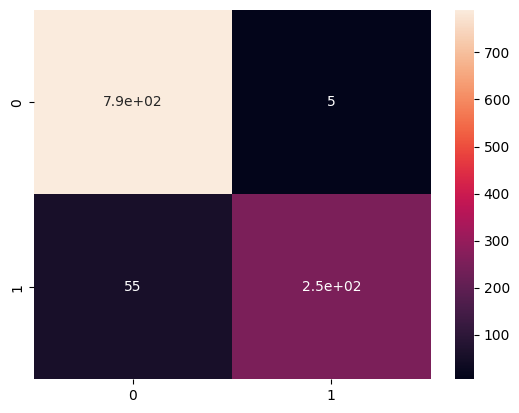

In [ ]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [ ]:
f1_score(Y_test,predictions)

0.8936170212765958